In [32]:
import pandas as pd
import seaborn as sns
import numpy as np

import scipy.stats as stats

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjust the configuration of the plots

# Read in the data

df = pd.read_csv(r'C:\Users\EJ\Documents\DataScience\Datasets\movies.csv')

In [33]:
# View the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [34]:
# Check for null data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col, pct_missing))

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [35]:
# Count no. of entries

entry_count = len(df)
print("No. of entries:", entry_count)

No. of entries: 7668


In [36]:
# Drop rows with null values on rating, score, votes, budget, gross, and runtime

df.dropna(subset=['rating', 'score', 'votes', 'budget', 'gross', 'runtime', 'company'], inplace=True)

# Check for null data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}'.format(col, pct_missing))

name - 0.0
rating - 0.0
genre - 0.0
year - 0.0
released - 0.0
score - 0.0
votes - 0.0
director - 0.0
writer - 0.0
star - 0.0
country - 0.0
budget - 0.0
gross - 0.0
company - 0.0
runtime - 0.0


In [37]:
# Check data type

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [38]:
# Format budget, gross, and votes column to integer to remove decimal
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [39]:
# Separate release_date and country_released from 'released' column

df['release_date'] = df['released'].str.split(' \(', 1).str[0]
df['country_released'] = df['released'].str.split(' \(', 1).str[1]

df.head()

C:\Users\Eliel John J Malabar\AppData\Local\Temp\ipykernel_5072\3096285298.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['release_date'] = df['released'].str.split(' \(', 1).str[0]
C:\Users\Eliel John J Malabar\AppData\Local\Temp\ipykernel_5072\3096285298.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['country_released'] = df['released'].str.split(' \(', 1).str[1]


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,country_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States)
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States)
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States)
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States)
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States)


In [40]:
# Drop ')' from country_released column

df['country_released'] = df['country_released'].str[:-1]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,country_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States


In [41]:
# Check data type

df.dtypes

name                 object
rating               object
genre                object
year                  int64
released             object
score               float64
votes                 int64
director             object
writer               object
star                 object
country              object
budget                int64
gross                 int64
company              object
runtime             float64
release_date         object
country_released     object
dtype: object

In [42]:
# Rename 'country' to 'country_produced'

df = df.rename(columns={'country': 'country_produced'})

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country_produced,budget,gross,company,runtime,release_date,country_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States


In [43]:
# Rename 'year' to 'year_produced'

df = df.rename(columns={'year': 'year_produced'})

df.head()

,name,rating,genre,year_produced,released,score,votes,director,writer,star,country_produced,budget,gross,company,runtime,release_date,country_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States


In [44]:
# Drop 'released' column

df = df.drop('released', axis=1)

df.head()

,name,rating,genre,year_produced,score,votes,director,writer,star,country_produced,budget,gross,company,runtime,release_date,country_released
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States


In [45]:
# create 'year_released' column copied from 'release_date' column

df['year_released'] = df['release_date'].str[-4:]

df.head()

,name,rating,genre,year_produced,score,votes,director,writer,star,country_produced,budget,gross,company,runtime,release_date,country_released,year_released
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States,1980
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States,1980
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States,1980


In [47]:
# Order by 'gross'

df.sort_values(by=['gross'], inplace=False, ascending=False)

df.head()

,name,rating,genre,year_produced,score,votes,director,writer,star,country_produced,budget,gross,company,runtime,release_date,country_released,year_released
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States,1980
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States,1980
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States,1980


In [48]:
# Count no. of entries

entry_count = len(df)
print("No. of entries:", entry_count)

No. of entries: 5421


In [53]:
# View distinct company names

# Remove limit on no. of entries displayed to see all company names
pd.set_option('display.max_rows', None)

# Drop duplicate 'company' names
df_company_sorted = df['company'].drop_duplicates().sort_values(ascending=True)

df_company_sorted.head()

4345        "DIA" Productions GmbH & Co. KG
7525    "Weathering With You" Film Partners
3024                        .406 Production
2929                          1492 Pictures
385                        1818 Productions
Name: company, dtype: object

In [54]:
# Reinstate 'display.max_rows' limit

pd.set_option('display.max_rows', 10)

In [56]:
# Count no. of companies

print("No. of companies:", len(df['company'].drop_duplicates()))

No. of companies: 1475


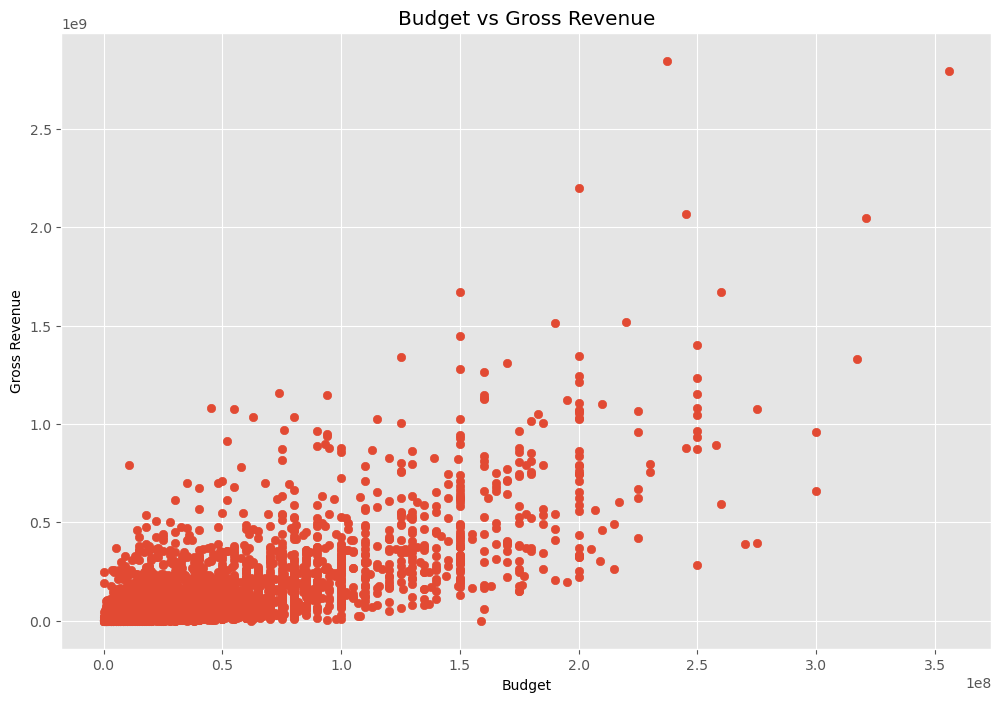

In [57]:
# Build Scatter Plot - budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

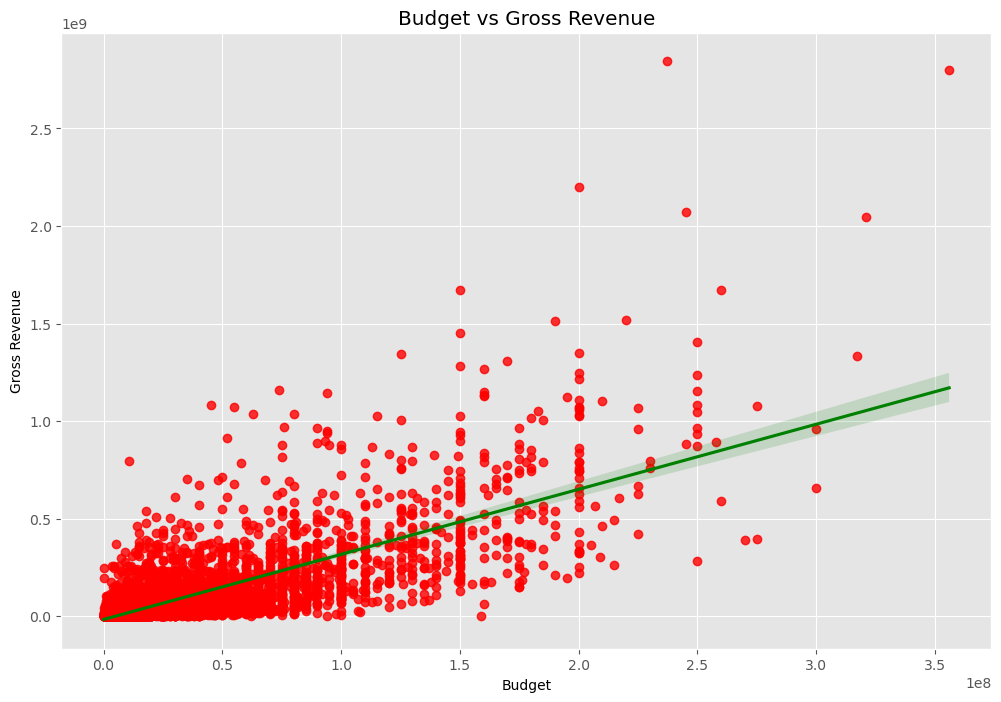

In [58]:
# Plot Regression Line - Gross Revenue vs Budget

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'green'})
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

C:\Users\Eliel John J Malabar\AppData\Local\Temp\ipykernel_5072\791398015.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


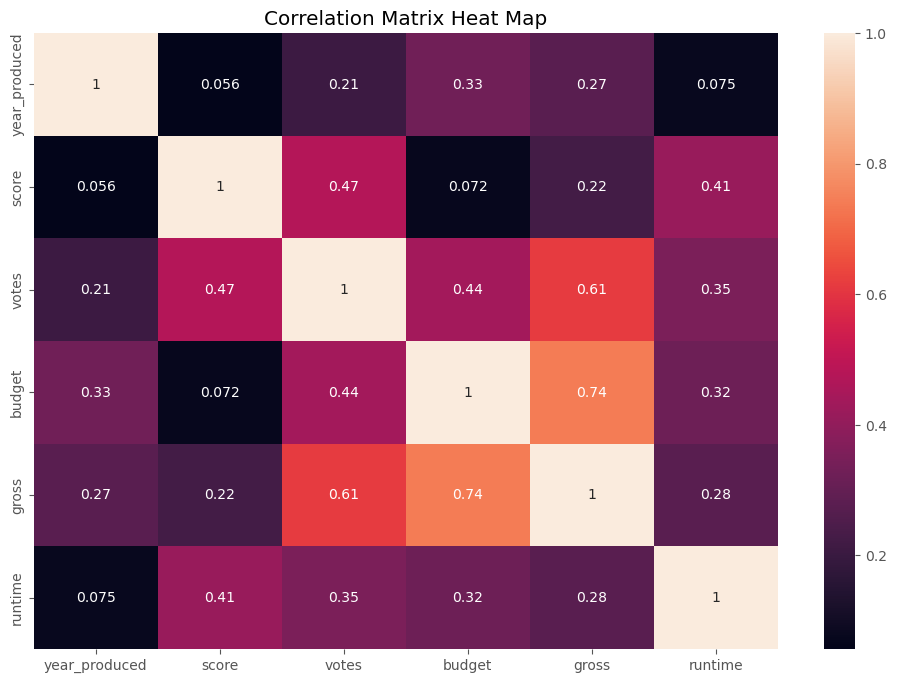

In [59]:
# Create Correlation Matrix on continous numeric values

correlation_matrix = df.corr(method='pearson')

# Create Heat Map

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heat Map')

plt.show()

In [60]:
# Checking for Correlation between specific film companies and gross revenue
# stats.pointbiserialr() - to check correlation between discrete binary and continuous numeric variable

# Twentieth Century Fox

# Create a binary variable whether a movie is made by Twentieth Century Fox
df['company_binary'] = df['company'].apply(lambda x: 1 if x == 'Twentieth Century Fox' else 0)

# Calculate the point-biserial correlation coefficient
correlation_Twentieth_Century_Fox, p_value_Twentieth_Century_Fox = stats.pointbiserialr(df['company_binary'], df['gross'])

print("Twentieth Century Fox")
print("Correlation:", correlation_Twentieth_Century_Fox)
print("P-value:", p_value_Twentieth_Century_Fox)

Twentieth Century Fox
Correlation: 0.09192002225284518
P-value: 1.196497972428915e-11


In [61]:
# Check company_binary for NaN values
nan_mask_company_binary = df['company_binary'].isnull()
company_binary_has_nan_values = nan_mask_company_binary.any()

# Check company_binary of inf values
inf_mask_company_binary = np.isinf(df['company_binary'])
company_binary_has_inf_values = inf_mask_company_binary.any()

# Print results
if company_binary_has_nan_values:
    print("'company_binary' column has NaN values.")
else:
    print("'company_binary' column has NO NaN values.")
if company_binary_has_inf_values:
    print("'company_binary' column has inf values.")
else:
    print("'company_binary' column has NO inf values.")

'company_binary' column has NO NaN values.
'company_binary' column has NO inf values.


In [62]:
# Check gross for NaN values
nan_mask_gross = df['gross'].isnull()
gross_has_nan_values = nan_mask_gross.any()

# Check gross of inf values
inf_mask_gross = np.isinf(df['gross'])
gross_has_inf_values = inf_mask_gross.any()

# Print results
if gross_has_nan_values:
    print("'gross' column has NaN values.")
else:
    print("'gross' column has NO NaN values.")
if gross_has_inf_values:
    print("'gross' column has inf values.")
else:
    print("'gross' column has NO inf values.")

'gross' column has NO NaN values.
'gross' column has NO inf values.


In [63]:
# Check for and drop missing rows on 'gross'

if df['gross'].isnull().any():
    # Handle by removing rows with missing values
    df.dropna(subset=['gross'], inplace=True)

In [64]:
# Check gross for NaN values
nan_mask_gross = df['gross'].isnull()
gross_has_nan_values = nan_mask_gross.any()

# Check gross of inf values
inf_mask_gross = np.isinf(df['gross'])
gross_has_inf_values = inf_mask_gross.any()

# Print results
if gross_has_nan_values:
    print("'gross' column has NaN values.")
else:
    print("'gross' column has NO NaN values.")
if gross_has_inf_values:
    print("'gross' column has inf values.")
else:
    print("'gross' column has NO inf values.")

'gross' column has NO NaN values.
'gross' column has NO inf values.


In [65]:
# Checking for Correlation between specific film companies and gross revenue
# stats.pointbiserialr() - to check correlation between discrete binary and continuous numeric variable

# Twentieth Century Fox

# Create a binary variable whether a movie is made by Twentieth Century Fox
df['company_binary'] = df['company'].apply(lambda x: 1 if x == 'Twentieth Century Fox' else 0)

# Calculate the point-biserial correlation coefficient
correlation_Twentieth_Century_Fox, p_value_Twentieth_Century_Fox = stats.pointbiserialr(df['company_binary'], df['gross'])

print("Company: Twentieth Century Fox")
print("Correlation:", correlation_Twentieth_Century_Fox)
print("P-value:", p_value_Twentieth_Century_Fox)

Company: Twentieth Century Fox
Correlation: 0.09192002225284518
P-value: 1.196497972428915e-11


In [66]:
print("There is a highly statistically significant,")
print("albeit weak positive correlation,")
print("between movies made by Twentieth Century Fox and Gross Revenue.")

There is a highly statistically significant,
albeit weak positive correlation,
between movies made by Twentieth Century Fox and Gross Revenue.


In [67]:
# Checking for Correlation between directors and gross revenue
# stats.pointbiserialr() - to check correlation between discrete binary and continuous numeric variable

# James Cameron

# Create a binary variable whether a movie is directed by James Cameron
df['director_binary'] = df['director'].apply(lambda x: 1 if x == 'James Cameron' else 0)

# Calculate the point-biserial correlation coefficient
correlation_James_Cameron, p_value_James_Cameron = stats.pointbiserialr(df['director_binary'], df['gross'])

print("Director: James Cameron")
print("Correlation:", correlation_James_Cameron)
print("P-value:", p_value_James_Cameron)

Director: James Cameron
Correlation: 0.151550693229009
P-value: 3.231370519562298e-29


In [68]:
print("There is a highly statistically significant,")
print("albeit weak positive correlation,")
print("between movies directed by James Cameron and Gross Revenue.")

There is a highly statistically significant,
albeit weak positive correlation,
between movies directed by James Cameron and Gross Revenue.


In [69]:
# Checking for Correlation between stars and gross revenue
# stats.pointbiserialr() - to check correlation between discrete binary and continuous numeric variable

# Robert Downey Jr.

# Create a binary variable whether a movie is starred by Robert Downey Jr.
df['star_binary'] = df['star'].apply(lambda x: 1 if x == 'Robert Downey Jr.' else 0)

# Calculate the point-biserial correlation coefficient
correlation_Robert_Downey_Jr, p_value_Robert_Downey_Jr = stats.pointbiserialr(df['star_binary'], df['gross'])

print("Director: Robert Downey Jr.")
print("Correlation:", correlation_Robert_Downey_Jr)
print("P-value:", p_value_Robert_Downey_Jr)

Director: Robert Downey Jr.
Correlation: 0.16490696840277114
P-value: 2.3530291430758753e-34


In [70]:
print("There is a highly statistically significant,")
print("albeit weak positive correlation,")
print("between movies starred by Robert Downey Jr. and Gross Revenue.")

There is a highly statistically significant,
albeit weak positive correlation,
between movies starred by Robert Downey Jr. and Gross Revenue.
